In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


from ful_con_nn_reg import NN as NN_reg

In [15]:
ds = pd.read_csv('./bank-churn.csv')

In [16]:
num1 = ds[ds['Exited']==1].__len__()
num0 = num1

In [17]:
ds = pd.concat([ds[ds['Exited']==1][:num1], ds[ds['Exited']==0][:num0]], axis=0)

In [18]:
ds = ds.sample(frac=1)

In [19]:
x = ds[['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = ds['Exited']

In [20]:
m = len(x)
tr_cv = round(0.8 * m)  # border between train and dev datasets
cv_test = round(0.9 * m) # border between dev and test datasets

X_train, X_cv, X_test = x[:tr_cv], x[tr_cv:cv_test], x[cv_test:]
y_train, y_cv, y_test = y[:tr_cv], y[tr_cv:cv_test], y[cv_test:]

In [21]:
def z_standartization(df, columns):
  mean_dict = {}
  sd_dict = {}
  new_df = df.copy()
  for col in columns:
    c = new_df[col]
    mean = c.mean()
    sd = c.std()
    new_df[col] = (c - mean) / sd

    mean_dict[col] = mean
    sd_dict[col] = sd
  return new_df, mean_dict, sd_dict

In [22]:
def z_standartization_means_sd_from_dict(df, mean_dict, sd_dict):
  new_df = df.copy()
  for col, mean in mean_dict.items():
    sd = sd_dict[col]

    new_df[col] = (new_df[col] - mean) / sd
  
  return new_df


In [23]:
columns_to_scale = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [24]:
scaled_X_train, mean_X_train, sd_X_train = z_standartization(X_train, columns_to_scale)

scaled_X_cv = z_standartization_means_sd_from_dict(X_cv, mean_X_train, sd_X_train)
scaled_X_test = z_standartization_means_sd_from_dict(X_test, mean_X_train, sd_X_train)

In [25]:
scaled_X_train = np.array(scaled_X_train, dtype=np.float64).T
scaled_X_cv = np.array(scaled_X_cv, dtype=np.float64).T
scaled_X_test = np.array(scaled_X_test, dtype=np.float64).T

y_train, y_cv, y_test = np.array(y_train).reshape(1, -1), np.array(y_cv).reshape(1, -1), np.array(y_test).reshape(1, -1)

(array([29611.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29520.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

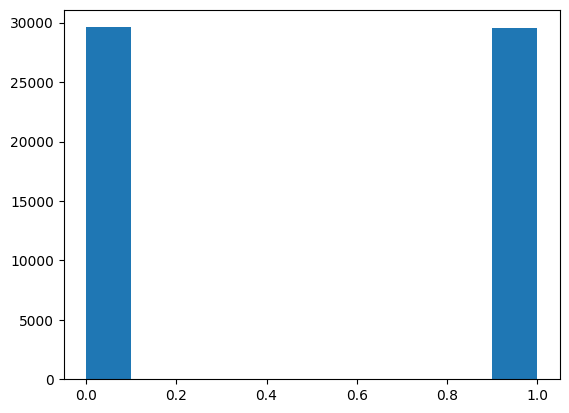

In [26]:
plt.hist(y_train.T)

In [38]:
model_1 = NN_reg([7, 10, 10, 1], W_init_scale=1)
J_history = []
J_cv_history = []

In [39]:
model_1.load_json('./model_params.json')

In [34]:
epochs = 1

In [40]:
J_h, J_cv_h = model_1.backward(scaled_X_train, y_train, l_rate=0.000000000001, epochs=epochs, keep_prob=1, X_cv=scaled_X_cv, Y_cv=y_cv)
J_history += J_h
J_cv_history += J_cv_h

----------------------------------
Changes in epoch 1:
J: [[0.56316553]] => [[0.56316553]]
MAE: [[0.39629477]] => [[0.39629477]]
Accuracy: 42306/59131 (71.55%) => 42306/59131 (71.55%)
J_cv: [[0.54690466]] => [[0.54690466]]
MAE_cv: [[0.36846008]] => [[0.36846008]]
Accuracy_cv: 5319/7392 (71.96%) => 5319/7392 (71.96%)
----------------------------------
Changes in epoch 2:
J: [[0.56316553]] => [[0.56316553]]
MAE: [[0.39629477]] => [[0.39629477]]
Accuracy: 42306/59131 (71.55%) => 42306/59131 (71.55%)
J_cv: [[0.54690466]] => [[0.54690466]]
MAE_cv: [[0.36846008]] => [[0.36846008]]
Accuracy_cv: 5319/7392 (71.96%) => 5319/7392 (71.96%)


In [41]:
len(J_history), len(J_cv_history)

(3, 3)

Text(0, 0.5, 'J value')

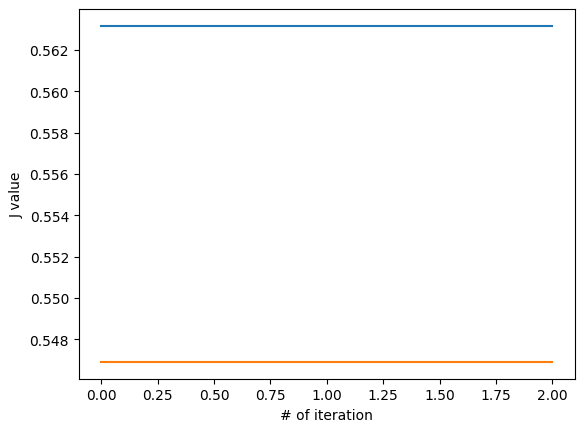

In [42]:
J_hist = [arr[0][0] for arr in J_history]
J_cv_hist = [arr[0][0] for arr in J_cv_history]
plt.plot(J_hist)
plt.plot(J_cv_hist)
plt.xlabel('# of iteration')
plt.ylabel('J value')

In [167]:
arr = np.random.rand(102459)

In [168]:
mb_size = 1000
mb_num = len(arr) // mb_size

In [169]:
mb_size*mb_num

102000

In [187]:
1000000 == int(1e+6)

True

In [175]:
arr[:mb_num*mb_size].reshape(mb_num, mb_size).shape

(102, 1000)

In [192]:
np.random.rand(2, 2).std()

0.2995648332047619

In [200]:
def softmax(arr):
  new_arr = []
  for el in arr:
    new_arr.append(np.exp(el)/np.exp(arr).sum())
  return new_arr

In [205]:
logits = np.array([0.5, -1, 0.1])
softmax(logits)

[0.528136412953437, 0.11784316240251767, 0.3540204246440453]